# Simulación de Montecarlo

Este notebook contiene todos los códigos de simulación de Montecarlo vistos en clase.

## Importaciones básicas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang
import pandas as pd

# Configuración para gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Problema 1: Gestión de inventario con demanda incierta

### Simulación base

Cantidad optima: 100 unidades
Costo promedio optimo: $5818.10


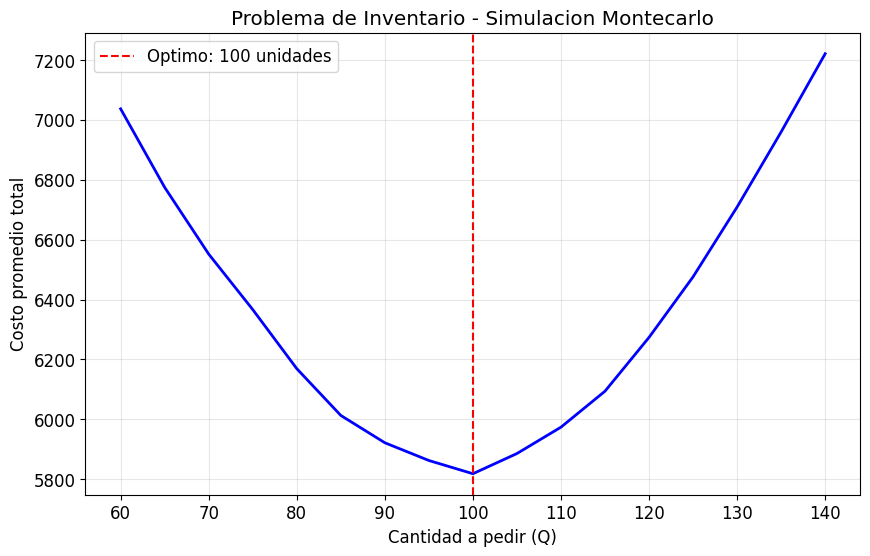

In [2]:
def simulacion_inventario(n_simulaciones=10000):
    # Parametros del problema
    media_demanda = 100
    desvio_demanda = 20
    costo_compra = 50
    costo_almacenamiento = 5
    costo_stockout = 100
    
    # Rango de cantidades a evaluar
    cantidades = range(60, 141, 5)
    costos_promedio = []
    
    for Q in cantidades:
        costos_totales = []
        
        for _ in range(n_simulaciones):
            # Generar demanda aleatoria
            demanda = max(0, np.random.normal(media_demanda, desvio_demanda))
            
            # Calcular costos
            costo_total = Q * costo_compra
            
            if demanda <= Q:
                # Hay inventario sobrante
                inventario_sobrante = Q - demanda
                costo_total += inventario_sobrante * costo_almacenamiento
            else:
                # Hay stockout
                stockout = demanda - Q
                costo_total += stockout * costo_stockout
            
            costos_totales.append(costo_total)
        
        costos_promedio.append(np.mean(costos_totales))
    
    return cantidades, costos_promedio

# Ejecutar simulacion
cantidades, costos = simulacion_inventario()

# Encontrar cantidad optima
indice_optimo = np.argmin(costos)
cantidad_optima = list(cantidades)[indice_optimo]
costo_optimo = costos[indice_optimo]

print(f"Cantidad optima: {cantidad_optima} unidades")
print(f"Costo promedio optimo: ${costo_optimo:.2f}")

# Graficar resultados
plt.plot(list(cantidades), costos, 'b-', linewidth=2)
plt.axvline(cantidad_optima, color='r', linestyle='--', 
           label=f'Optimo: {cantidad_optima} unidades')
plt.xlabel('Cantidad a pedir (Q)')
plt.ylabel('Costo promedio total')
plt.title('Problema de Inventario - Simulacion Montecarlo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Sensibilidad vs. demanda media

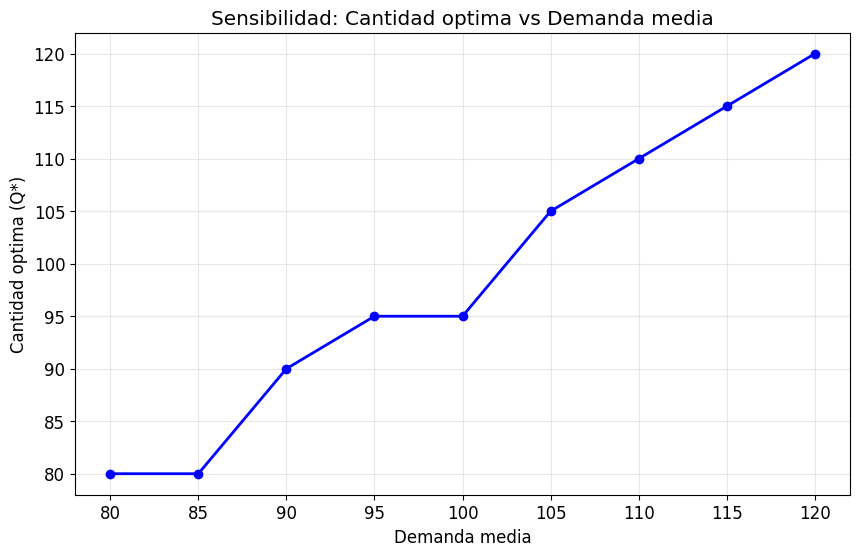

In [3]:
def sensibilidad_demanda_inventario():
    sim = 10000
    desvio_demanda = 20
    costo_compra = 50
    costo_almacenamiento = 5
    costo_stockout = 100

    # Rango de demandas medias a evaluar
    demandas_medias = np.arange(80, 121, 5)
    Q_vals = np.arange(60, 141, 5)
    Q_opts = []
    C_mins = []

    for media_demanda in demandas_medias:
        costos_promedio = []
        
        for Q in Q_vals:
            costos_totales = []
            
            for _ in range(sim):
                # Generar demanda aleatoria
                demanda = max(0, np.random.normal(media_demanda, desvio_demanda))
                
                # Calcular costos
                costo_total = Q * costo_compra
                
                if demanda <= Q:
                    inventario_sobrante = Q - demanda
                    costo_total += inventario_sobrante * costo_almacenamiento
                else:
                    stockout = demanda - Q
                    costo_total += stockout * costo_stockout
                
                costos_totales.append(costo_total)
            
            costos_promedio.append(np.mean(costos_totales))
        
        # Encontrar Q optimo para esta demanda media
        idx_optimo = np.argmin(costos_promedio)
        Q_opt = Q_vals[idx_optimo]
        C_min = costos_promedio[idx_optimo]
        
        Q_opts.append(Q_opt)
        C_mins.append(C_min)

    return demandas_medias, Q_opts, C_mins

# Ejecutar analisis de sensibilidad
demandas_medias, Q_opts, C_mins = sensibilidad_demanda_inventario()

# Graficar sensibilidad
plt.plot(demandas_medias, Q_opts, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Demanda media')
plt.ylabel('Cantidad optima (Q*)')
plt.title('Sensibilidad: Cantidad optima vs Demanda media')
plt.grid(True, alpha=0.3)
plt.show()

## Problema 2: Optimización de reparto

### Simulación base

M optimo: 7 repartidores
Costo promedio optimo: $888.03


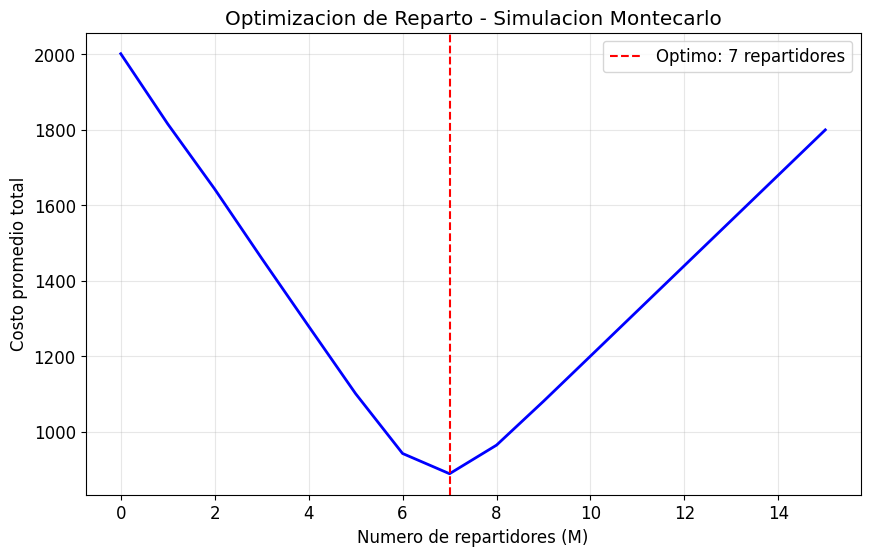

In [4]:
def simulacion_reparto():
    # parametros del problema
    lam = 80
    cap_por_repartidor = 12
    costo_repartidor = 120
    costo_penal = 25
    sim = 10000
    np.random.seed(42)

    # rango de M
    M_vals = np.arange(0, 16)
    costos_prom = []

    for M in M_vals:
        # 1) simular demanda
        demanda = np.random.poisson(lam=lam, size=sim)
        # 2) calcular demanda insatisfecha
        capacidad_total = cap_por_repartidor * M
        pedidos_no_servidos = np.maximum(demanda - capacidad_total, 0)
        # 3) costo total
        costo_operativo = costo_repartidor * M
        costo_penalizacion = costo_penal * pedidos_no_servidos
        costo_total = costo_operativo + costo_penalizacion
        costos_prom.append(costo_total.mean())

    return M_vals, costos_prom

# Ejecutar simulacion
M_vals, costos_prom = simulacion_reparto()

# elegir M optimo
idx_optimo = np.argmin(costos_prom)
M_opt, C_min = M_vals[idx_optimo], costos_prom[idx_optimo]
print(f"M optimo: {M_opt} repartidores")
print(f"Costo promedio optimo: ${C_min:.2f}")

# Graficar resultados
plt.plot(M_vals, costos_prom, 'b-', linewidth=2)
plt.axvline(M_opt, color='r', linestyle='--', 
           label=f'Optimo: {M_opt} repartidores')
plt.xlabel('Numero de repartidores (M)')
plt.ylabel('Costo promedio total')
plt.title('Optimizacion de Reparto - Simulacion Montecarlo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Sensibilidad vs. λ (tasa de demanda)

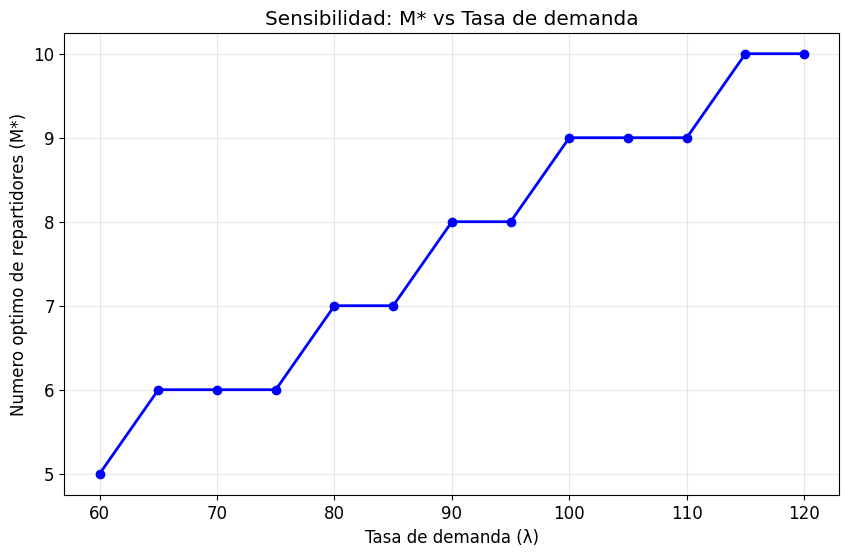

In [5]:
def sensibilidad_lambda_reparto():
    sim = 10000
    cap_por_repartidor = 12
    costo_repartidor = 120
    costo_penal = 25

    lambdas = np.arange(60, 121, 5)
    M_vals = np.arange(0, 20)
    M_opts = []
    C_mins = []

    for lam in lambdas:
        costos_prom = []
        for M in M_vals:
            demanda = np.random.poisson(lam=lam, size=sim)
            capacidad_total = cap_por_repartidor * M
            pedidos_no_servidos = np.maximum(demanda - capacidad_total, 0)
            costo_operativo = costo_repartidor * M
            costo_penalizacion_total = costo_penal * pedidos_no_servidos
            costo_total_promedio = (costo_operativo + costo_penalizacion_total).mean()
            costos_prom.append(costo_total_promedio)
        idx_optimo = np.argmin(costos_prom)
        M_opt, C_min = M_vals[idx_optimo], costos_prom[idx_optimo]
        M_opts.append(M_opt)
        C_mins.append(C_min)
    
    return lambdas, M_opts, C_mins

# Ejecutar analisis de sensibilidad
lambdas, M_opts, C_mins = sensibilidad_lambda_reparto()

# Graficar sensibilidad
plt.plot(lambdas, M_opts, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Tasa de demanda (λ)')
plt.ylabel('Numero optimo de repartidores (M*)')
plt.title('Sensibilidad: M* vs Tasa de demanda')
plt.grid(True, alpha=0.3)
plt.show()

## Problema 3: Optimización de mantenimiento

### Simulación base

T optimo: 13 dias
Costo diario promedio optimo: $410.63


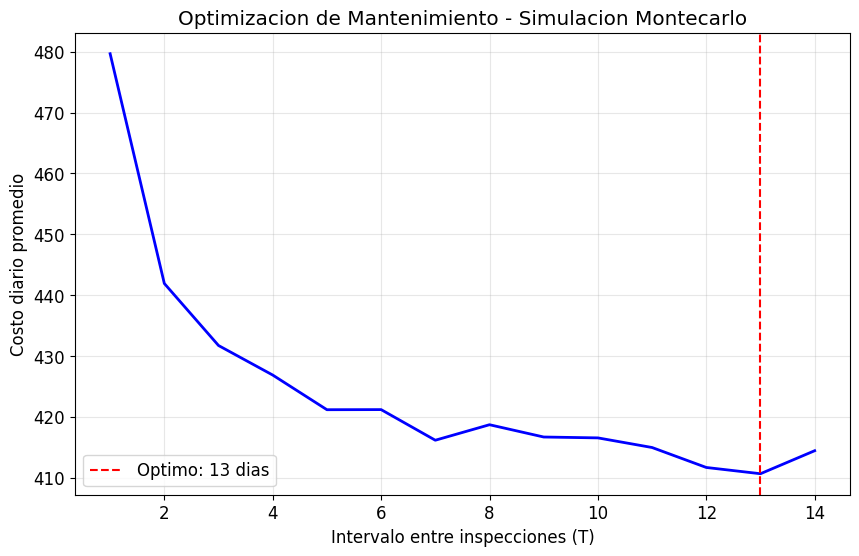

In [6]:
def simulacion_mantenimiento():
    r, p = 5, 0.20
    costo_falla_catastrofica = 10000
    costo_preventivo = 2000
    costo_inspeccion = 400
    sim = 20000
    np.random.seed(42)

    T_vals = np.arange(1, 15)
    costos_por_dia = []

    for T in T_vals:
        # 1) simular D
        D_fracasos = np.random.negative_binomial(r, p, size=sim)
        D = D_fracasos + r
        # 2) costos de mantenimiento
        mantenimiento_catastrofico = (D % T != 0) * costo_falla_catastrofica
        mantenimiento_preventivo = (D % T == 0) * costo_preventivo
        costo_mantenimiento = mantenimiento_catastrofico + mantenimiento_preventivo
        # 3) costos de inspeccion
        num_inspecciones = np.ceil(D / T)
        costo_inspeccion_ciclo = num_inspecciones * costo_inspeccion
        # 4) costo diario esperado
        costo_total_ciclo = costo_mantenimiento + costo_inspeccion_ciclo
        costo_diario_promedio = costo_total_ciclo.mean() / D.mean()
        costos_por_dia.append(costo_diario_promedio)

    return T_vals, costos_por_dia

# Ejecutar simulacion
T_vals, costos_por_dia = simulacion_mantenimiento()

idx_optimo = np.argmin(costos_por_dia)
T_opt, C_min = T_vals[idx_optimo], costos_por_dia[idx_optimo]
print(f"T optimo: {T_opt} dias")
print(f"Costo diario promedio optimo: ${C_min:.2f}")

# Graficar resultados
plt.plot(T_vals, costos_por_dia, 'b-', linewidth=2)
plt.axvline(T_opt, color='r', linestyle='--', 
           label=f'Optimo: {T_opt} dias')
plt.xlabel('Intervalo entre inspecciones (T)')
plt.ylabel('Costo diario promedio')
plt.title('Optimizacion de Mantenimiento - Simulacion Montecarlo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Sensibilidad vs. cf (costo de falla catastrófica)

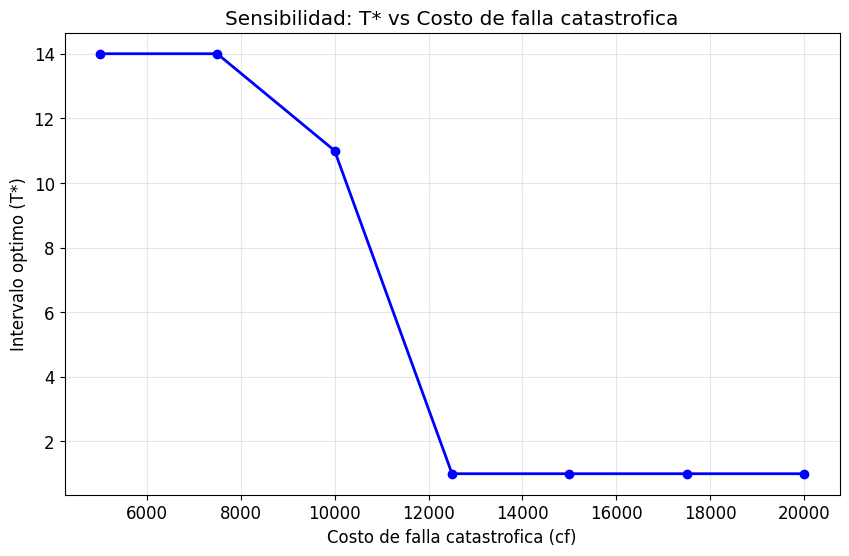

In [7]:
def sensibilidad_cf_mantenimiento():
    sim = 10000
    r, p = 5, 0.20
    costo_preventivo = 2000
    costo_inspeccion = 400

    cf_vals = np.arange(5000, 20001, 2500)
    T_vals = np.arange(1, 15)
    T_opts = []
    C_mins = []

    # media teorica de D
    D_mean_fracasos = r * (1 - p) / p
    D_mean = D_mean_fracasos + r

    for costo_falla_catastrofica in cf_vals:
        costos_diarios_prom = []
        # simular D una sola vez (CRN)
        D_fracasos_sim = np.random.negative_binomial(r, p, size=sim)
        D_sim = D_fracasos_sim + r
        for T in T_vals:
            mantenimiento_catastrofico = (D_sim % T != 0) * costo_falla_catastrofica
            mantenimiento_preventivo = (D_sim % T == 0) * costo_preventivo
            costo_mantenimiento = mantenimiento_catastrofico + mantenimiento_preventivo
            num_inspecciones = np.ceil(D_sim / T)
            costo_inspeccion_ciclo = num_inspecciones * costo_inspeccion
            costo_total_ciclo = costo_mantenimiento + costo_inspeccion_ciclo
            costo_diario_promedio = costo_total_ciclo.mean() / D_mean
            costos_diarios_prom.append(costo_diario_promedio)
        idx_optimo = np.argmin(costos_diarios_prom)
        T_opt, C_min = T_vals[idx_optimo], costos_diarios_prom[idx_optimo]
        T_opts.append(T_opt)
        C_mins.append(C_min)
    
    return cf_vals, T_opts, C_mins

# Ejecutar analisis de sensibilidad
cf_vals, T_opts, C_mins = sensibilidad_cf_mantenimiento()

# Graficar sensibilidad
plt.plot(cf_vals, T_opts, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Costo de falla catastrofica (cf)')
plt.ylabel('Intervalo optimo (T*)')
plt.title('Sensibilidad: T* vs Costo de falla catastrofica')
plt.grid(True, alpha=0.3)
plt.show()

## Problema 4: Riesgo en proyecto

### Simulación base

Probabilidad de retraso: 0.4297 (42.97%)
Costo esperado de penalizacion: $423.26


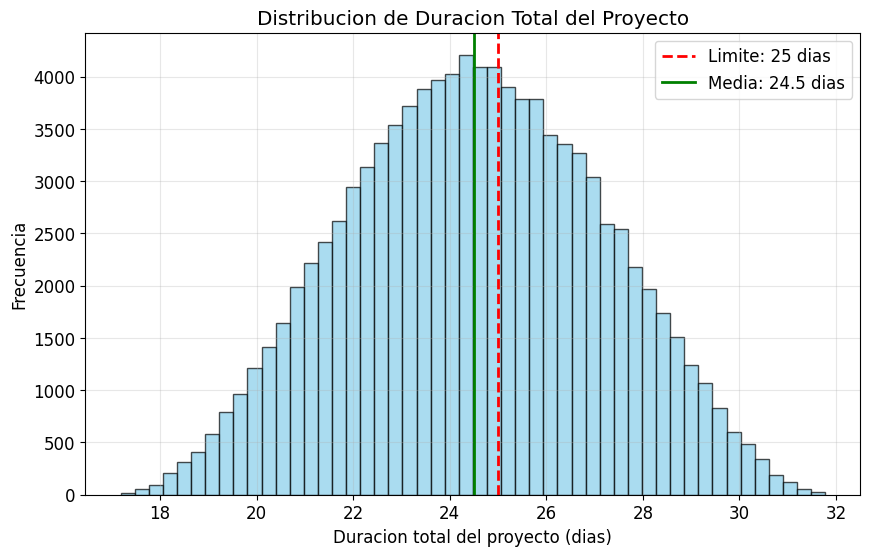

In [8]:
def simulacion_proyecto():
    fecha_limite = 25
    costo_penalizacion = 500
    sim = 100000
    np.random.seed(42)

    tareas = {'A': (5, 10), 'B': (8, 15), 'C': (4, 7)}

    duracion_A = np.random.uniform(tareas['A'][0], tareas['A'][1], size=sim)
    duracion_B = np.random.uniform(tareas['B'][0], tareas['B'][1], size=sim)
    duracion_C = np.random.uniform(tareas['C'][0], tareas['C'][1], size=sim)
    D_total = duracion_A + duracion_B + duracion_C

    retraso = np.maximum(D_total - fecha_limite, 0)
    E_costo = (retraso * costo_penalizacion).mean()
    P_retraso = (D_total > fecha_limite).mean()
    
    return D_total, P_retraso, E_costo

# Ejecutar simulacion
D_total, P_retraso, E_costo = simulacion_proyecto()

print(f"Probabilidad de retraso: {P_retraso:.4f} ({P_retraso*100:.2f}%)")
print(f"Costo esperado de penalizacion: ${E_costo:.2f}")

# Graficar distribucion de duracion total
plt.hist(D_total, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(25, color='red', linestyle='--', linewidth=2, label='Limite: 25 dias')
plt.axvline(D_total.mean(), color='green', linestyle='-', linewidth=2, 
           label=f'Media: {D_total.mean():.1f} dias')
plt.xlabel('Duracion total del proyecto (dias)')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Duracion Total del Proyecto')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Sensibilidad vs. bB (tiempo máximo de construcción)

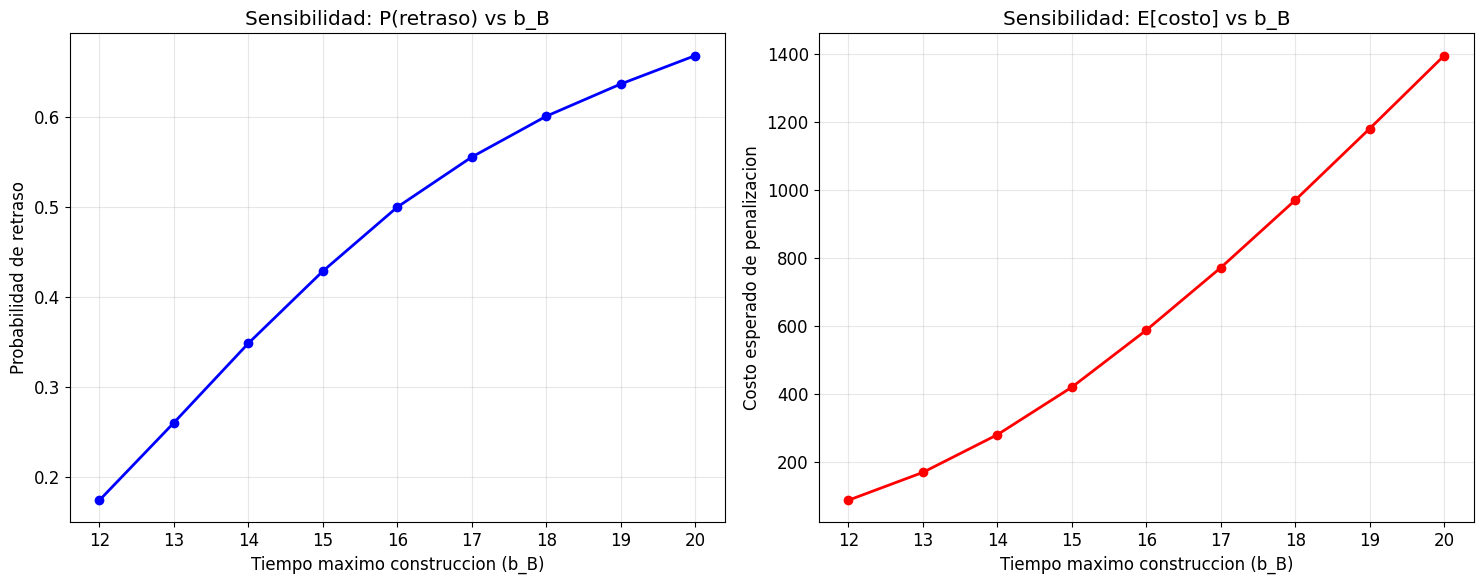

In [9]:
def sensibilidad_bB_proyecto():
    sim = 100000
    fecha_limite = 25
    costo_penalizacion = 500

    tareas_fijas = {'A': (5, 10), 'C': (4, 7)}
    a_B = 8

    b_B_vals = np.arange(12, 21, 1)
    P_retraso_vals = []
    E_costo_vals = []

    for b_B in b_B_vals:
        duracion_A = np.random.uniform(tareas_fijas['A'][0], tareas_fijas['A'][1], size=sim)
        duracion_B = np.random.uniform(a_B, b_B, size=sim)
        duracion_C = np.random.uniform(tareas_fijas['C'][0], tareas_fijas['C'][1], size=sim)
        D_total = duracion_A + duracion_B + duracion_C
        retraso = np.maximum(D_total - fecha_limite, 0)
        E_costo = (retraso * costo_penalizacion).mean()
        P_retraso = (D_total > fecha_limite).mean()
        P_retraso_vals.append(P_retraso)
        E_costo_vals.append(E_costo)
    
    return b_B_vals, P_retraso_vals, E_costo_vals

# Ejecutar analisis de sensibilidad
b_B_vals, P_retraso_vals, E_costo_vals = sensibilidad_bB_proyecto()

# Graficar sensibilidad
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(b_B_vals, P_retraso_vals, 'bo-', linewidth=2, markersize=6)
ax1.set_xlabel('Tiempo maximo construccion (b_B)')
ax1.set_ylabel('Probabilidad de retraso')
ax1.set_title('Sensibilidad: P(retraso) vs b_B')
ax1.grid(True, alpha=0.3)

ax2.plot(b_B_vals, E_costo_vals, 'ro-', linewidth=2, markersize=6)
ax2.set_xlabel('Tiempo maximo construccion (b_B)')
ax2.set_ylabel('Costo esperado de penalizacion')
ax2.set_title('Sensibilidad: E[costo] vs b_B')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Verificación de convergencia

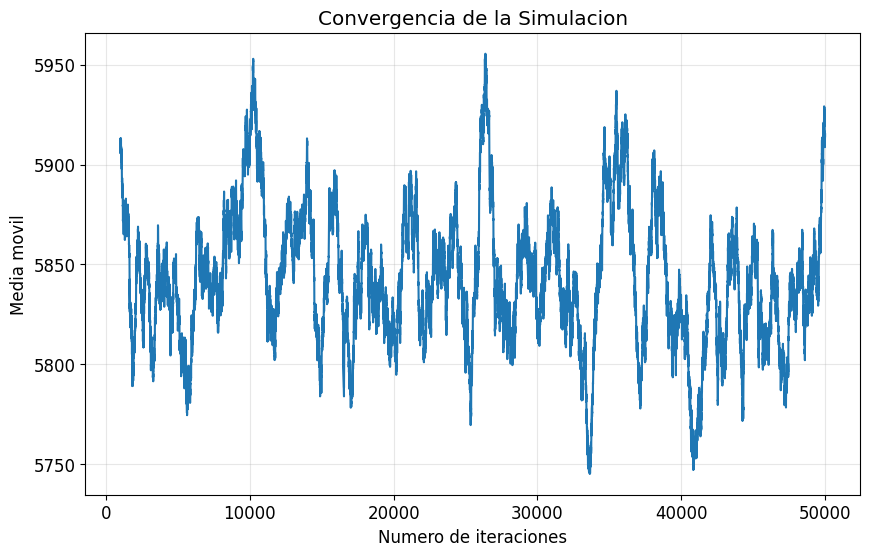

In [10]:
def verificar_convergencia(resultados, ventana=1000):
    medias_moviles = []
    for i in range(ventana, len(resultados)):
        media_movil = np.mean(resultados[i-ventana:i])
        medias_moviles.append(media_movil)
    
    plt.plot(range(ventana, len(resultados)), medias_moviles)
    plt.xlabel('Numero de iteraciones')
    plt.ylabel('Media movil')
    plt.title('Convergencia de la Simulacion')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return medias_moviles

# Ejemplo de uso con el problema de inventario
def ejemplo_convergencia():
    # Simular con mas iteraciones para ver convergencia
    media_demanda = 100
    desvio_demanda = 20
    Q = 100  # cantidad fija
    
    costos = []
    for _ in range(50000):
        demanda = max(0, np.random.normal(media_demanda, desvio_demanda))
        costo_total = Q * 50  # costo compra
        if demanda <= Q:
            inventario_sobrante = Q - demanda
            costo_total += inventario_sobrante * 5
        else:
            stockout = demanda - Q
            costo_total += stockout * 100
        costos.append(costo_total)
    
    verificar_convergencia(costos)

ejemplo_convergencia()

## Código básico para distribuciones

In [11]:
# Generar numeros aleatorios de diferentes distribuciones
def generar_distribuciones():
    # Uniforme - valores entre 0 y 1
    uniforme = np.random.uniform(0, 1, 1000)

    # Normal - media 100, desviacion 15
    normal = np.random.normal(100, 15, 1000)

    # Exponencial - tasa 2
    exponencial = np.random.exponential(2, 1000)

    # Poisson - tasa 5
    poisson = np.random.poisson(5, 1000)

    # Binomial - 10 ensayos, probabilidad 0.3
    binomial = np.random.binomial(10, 0.3, 1000)

    # Binomial Negativa - 5 exitos requeridos, probabilidad 0.7
    binomial_negativa = np.random.negative_binomial(5, 0.7, 1000)
    
    return {
        'uniforme': uniforme,
        'normal': normal,
        'exponencial': exponencial,
        'poisson': poisson,
        'binomial': binomial,
        'binomial_negativa': binomial_negativa
    }

# Ejemplo simple: calcular el area de un circulo usando Montecarlo
def simulacion_montecarlo_circulo(n_iteraciones=10000):
    resultados = []
    
    for _ in range(n_iteraciones):
        # Generar punto aleatorio en cuadrado [-1,1] x [-1,1]
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        
        # Verificar si esta dentro del circulo unitario
        if x**2 + y**2 <= 1:
            resultados.append(1)  # Dentro del circulo
        else:
            resultados.append(0)  # Fuera del circulo
    
    return np.array(resultados)

# Ejecutar simulacion del circulo
resultados_circulo = simulacion_montecarlo_circulo()
# El area del circulo es aproximadamente 4 * (promedio de resultados)
area_estimada = 4 * np.mean(resultados_circulo)
print(f"Area estimada del circulo: {area_estimada:.4f}")
print(f"Area real: {np.pi:.4f}")
print(f"Error: {abs(area_estimada - np.pi):.4f}")

Area estimada del circulo: 3.1544
Area real: 3.1416
Error: 0.0128
